In [1]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

def get_data(order, x_1, y_1):
    x_1p = np.vstack([x_1**i for i in range(1, order + 1)])
    x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / x_1p.std(axis=1, keepdims=True)
    y_1s = (y_1 - y_1.mean()) / y_1.std()

    return (x_1s, y_1s)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


**1.**

In [16]:
dummy_data = np.loadtxt("dummy.csv")
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]
x_1s, y_1s = get_data(5, x_1, y_1)

In [17]:
order = 5
model_p1 = pm.Model()
model_p2 = pm.Model()
model_p3 = pm.Model()

#a)
with model_p1:
    alpha = pm.Normal("alpha", mu=0, sigma=1)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=order)
    epsilon = pm.HalfNormal("epsilon", 5)
    miu = alpha + pm.math.dot(beta, x_1s)
    y_pred = pm.Normal("y_pred", mu=miu, sigma=epsilon, observed=y_1s)
    idata_p1 = pm.sample(2000, target_accept=0.9, return_inferencedata=True)
    
#b.1)
with model_p2:
    alpha = pm.Normal("alpha", mu=0, sigma=1)
    beta = pm.Normal("beta", mu=0, sigma=100, shape=order)
    epsilon = pm.HalfNormal("epsilon", 5)
    miu = alpha + pm.math.dot(beta, x_1s)
    y_pred = pm.Normal("y_pred", mu=miu, sigma=epsilon, observed=y_1s)
    idata_p2 = pm.sample(2000, target_accept=0.9, return_inferencedata=True)
    
#b.2)
with model_p3:
    alpha = pm.Normal("alpha", mu=0, sigma=1)
    beta = pm.Normal("beta", mu=0, sigma=np.array([10, 0.1, 0.1, 0.1, 0.1]), shape=order)
    epsilon = pm.HalfNormal("epsilon", 5)
    miu = alpha + pm.math.dot(beta, x_1s)
    y_pred = pm.Normal("y_pred", mu=miu, sigma=epsilon, observed=y_1s)
    idata_p3 = pm.sample(2000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 153 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 173 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 22 seconds.


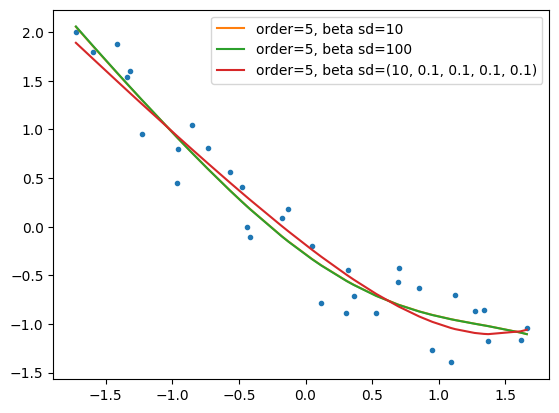

In [18]:
#reprezentarea grafica a modelelor
idx = np.argsort(x_1s[0])

alpha_p1_post = idata_p1.posterior["alpha"].mean(("chain", "draw")).values
beta_p1_post = idata_p1.posterior["beta"].mean(("chain", "draw")).values
y_p1_post = alpha_p1_post + np.dot(beta_p1_post, x_1s)

alpha_p2_post = idata_p2.posterior["alpha"].mean(("chain", "draw")).values
beta_p2_post = idata_p2.posterior["beta"].mean(("chain", "draw")).values
y_p2_post = alpha_p2_post + np.dot(beta_p2_post, x_1s)

alpha_p3_post = idata_p3.posterior["alpha"].mean(("chain", "draw")).values
beta_p3_post = idata_p3.posterior["beta"].mean(("chain", "draw")).values
y_p3_post = alpha_p3_post + np.dot(beta_p3_post, x_1s)

plt.plot(x_1s[0][idx], y_p1_post[idx], "C1", label=f"order={order}, beta sd=10")
plt.plot(x_1s[0][idx], y_p2_post[idx], "C2", label=f"order={order}, beta sd=100")
plt.plot(x_1s[0][idx], y_p3_post[idx], "C3", label=f"order={order}, beta sd=(10, 0.1, 0.1, 0.1, 0.1)")

plt.scatter(x_1s[0], y_1s, c="C0", marker=".")
plt.legend()
plt.show()

Curbele pentru cazul sd=10 si sd=100 sunt foarte similare, dupa cum se poate observa din grafic, ele aproape se suprapun. În schimb, pentru sd=(10, 0.1, 0.1, 0.1, 0.1), coeficienții monoamelor de grad>1 sunt forțați să se apropie de 0, deci graficul este mai apropiat de modelul liniar.

**2.**

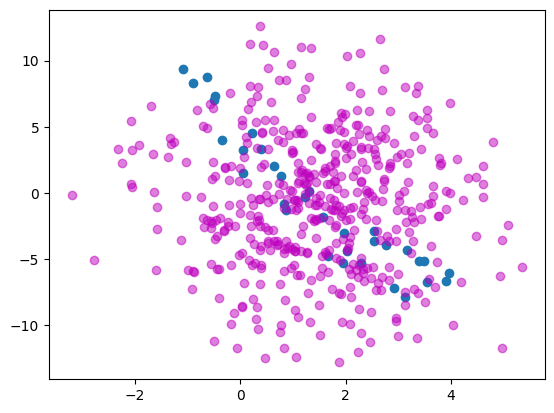

In [19]:
#adăugăm alte date pentru a ajunge la 500, la o scară asemănătoare:
x_1_add = np.random.normal(np.mean(x_1),np.std(x_1),size=500-len(x_1))
y_1_add = np.random.normal(np.mean(y_1),np.std(y_1),size=500-len(y_1))
x_1_500 = np.concatenate((x_1,x_1_add))
y_1_500 = np.concatenate((y_1,y_1_add))

#vizualizarea datelor:
plt.scatter(x_1,y_1)
plt.scatter(x_1_add,y_1_add,color='m',alpha=0.5)

In [20]:
x_1s_500, y_1s_500 = get_data(5, x_1_500, y_1_500)
order = 5
model_p1_500 = pm.Model()
model_p2_500 = pm.Model()
model_p3_500 = pm.Model()

#a)
with model_p1_500:
    alpha = pm.Normal("alpha", mu=0, sigma=1)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=order)
    epsilon = pm.HalfNormal("epsilon", 5)
    miu = alpha + pm.math.dot(beta, x_1s_500)
    y_pred = pm.Normal("y_pred", mu=miu, sigma=epsilon, observed=y_1s_500)
    idata_p1_500 = pm.sample(2000, target_accept=0.9, return_inferencedata=True)
    
#b.1)
with model_p2_500:
    alpha = pm.Normal("alpha", mu=0, sigma=1)
    beta = pm.Normal("beta", mu=0, sigma=100, shape=order)
    epsilon = pm.HalfNormal("epsilon", 5)
    miu = alpha + pm.math.dot(beta, x_1s_500)
    y_pred = pm.Normal("y_pred", mu=miu, sigma=epsilon, observed=y_1s_500)
    idata_p2_500 = pm.sample(2000, target_accept=0.9, return_inferencedata=True)
    
#b.2)
with model_p3_500:
    alpha = pm.Normal("alpha", mu=0, sigma=1)
    beta = pm.Normal("beta", mu=0, sigma=np.array([10, 0.1, 0.1, 0.1, 0.1]), shape=order)
    epsilon = pm.HalfNormal("epsilon", 5)
    miu = alpha + pm.math.dot(beta, x_1s_500)
    y_pred = pm.Normal("y_pred", mu=miu, sigma=epsilon, observed=y_1s_500)
    idata_p3_500 = pm.sample(2000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 47 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 47 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 22 seconds.


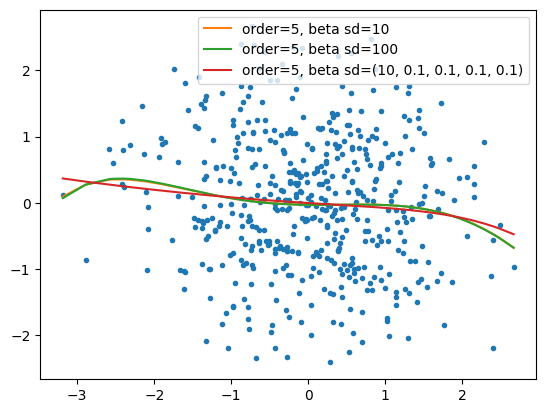

In [23]:
#reprezentarea grafica a modelelor
idx = np.argsort(x_1s_500[0])

alpha_p1_post_500 = idata_p1_500.posterior["alpha"].mean(("chain", "draw")).values
beta_p1_post_500 = idata_p1_500.posterior["beta"].mean(("chain", "draw")).values
y_p1_post_500 = alpha_p1_post_500 + np.dot(beta_p1_post_500, x_1s_500)

alpha_p2_post_500 = idata_p2_500.posterior["alpha"].mean(("chain", "draw")).values
beta_p2_post_500 = idata_p2_500.posterior["beta"].mean(("chain", "draw")).values
y_p2_post_500 = alpha_p2_post_500 + np.dot(beta_p2_post_500, x_1s_500)

alpha_p3_post_500 = idata_p3_500.posterior["alpha"].mean(("chain", "draw")).values
beta_p3_post_500 = idata_p3_500.posterior["beta"].mean(("chain", "draw")).values
y_p3_post_500 = alpha_p3_post_500 + np.dot(beta_p3_post_500, x_1s_500)

plt.plot(x_1s_500[0][idx], y_p1_post_500[idx], "C1", label=f"order={order}, beta sd=10")
plt.plot(x_1s_500[0][idx], y_p2_post_500[idx], "C2", label=f"order={order}, beta sd=100")
plt.plot(x_1s_500[0][idx], y_p3_post_500[idx], "C3", label=f"order={order}, beta sd=(10, 0.1, 0.1, 0.1, 0.1)")

plt.scatter(x_1s_500[0], y_1s_500, c="C0", marker=".")
plt.legend()
plt.show()

Observăm că datele inițiale influențează polinoamele de regresie, dar foarte puțin (întrucât sunt dominate numeric de datele adăugate). Evident, se pot adăuga date în diverse maniere.

**3.**

In [25]:
#modelul liniar (din curs):
x_1s, y_1s = get_data(1, x_1, y_1)
with pm.Model() as model_l:
    α = pm.Normal('α', mu=0, sigma=1)
    β = pm.Normal('β', mu=0, sigma=10)
    ε = pm.HalfNormal('ε', 5)
    μ = α + β * x_1s[0]
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
    idata_l = pm.sample(2000, return_inferencedata=True)

model_p_ord2 = pm.Model()
model_p_ord3 = pm.Model()

order = 2
x_1s, y_1s = get_data(order, x_1, y_1)
with model_p_ord2:
    alpha = pm.Normal("alpha", mu=0, sigma=1)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=order)
    epsilon = pm.HalfNormal("epsilon", 5)
    miu = alpha + pm.math.dot(beta, x_1s)
    y_pred = pm.Normal("y_pred", mu=miu, sigma=epsilon, observed=y_1s)
    idata_p_ord2 = pm.sample(2000, target_accept=0.9, return_inferencedata=True)
    
order = 3
x_1s, y_1s = get_data(order, x_1, y_1)
with model_p_ord3:
    alpha = pm.Normal("alpha", mu=0, sigma=1)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=order)
    epsilon = pm.HalfNormal("epsilon", 5)
    miu = alpha + pm.math.dot(beta, x_1s)
    y_pred = pm.Normal("y_pred", mu=miu, sigma=epsilon, observed=y_1s)
    idata_p_ord3 = pm.sample(2000, target_accept=0.9, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, ε]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 19 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 21 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.


In [ ]:
pm.compute_log_likelihood(idata_l, model=model_l)
pm.compute_log_likelihood(idata_p_ord2, model=model_p_ord2)
pm.compute_log_likelihood(idata_p_ord3, model=model_p_ord3)

              rank  elpd_waic    p_waic  elpd_diff    weight        se  \
model_p_ord2     0   9.011084  2.584532   0.000000  0.704970  4.446459   
model_p_ord3     1  10.832684  3.231066   1.821599  0.293946  5.218569   
model_l          2  28.623774  2.385220  19.612690  0.001084  4.548790   

                   dse  warning     scale  
model_p_ord2  0.000000    False  deviance  
model_p_ord3  0.716221    False  deviance  
model_l       5.282433    False  deviance  


<Axes: title={'center': 'Model comparison\nlower is better'}, xlabel='elpd_waic (deviance)', ylabel='ranked models'>

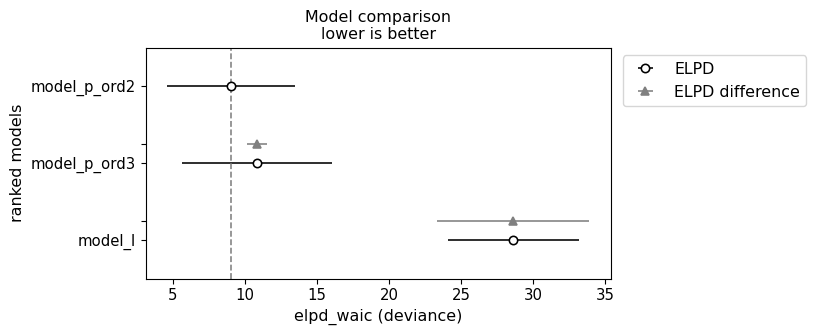

In [34]:
cmp_waic = az.compare({'model_l':idata_l, 'model_p_ord2':idata_p_ord2, 'model_p_ord3':idata_p_ord3},method='BB-pseudo-BMA', ic="waic", scale="deviance")
print(cmp_waic)
az.plot_compare(cmp_waic)

              rank   elpd_loo     p_loo  elpd_diff    weight        se  \
model_p_ord2     0   9.065117  2.611548   0.000000  0.716185  4.436512   
model_p_ord3     1  10.952392  3.290920   1.887275  0.282802  5.190836   
model_l          2  28.678056  2.412361  19.612939  0.001013  4.472212   

                   dse  warning     scale  
model_p_ord2  0.000000    False  deviance  
model_p_ord3  0.729180    False  deviance  
model_l       5.293214    False  deviance  


<Axes: title={'center': 'Model comparison\nlower is better'}, xlabel='elpd_loo (deviance)', ylabel='ranked models'>

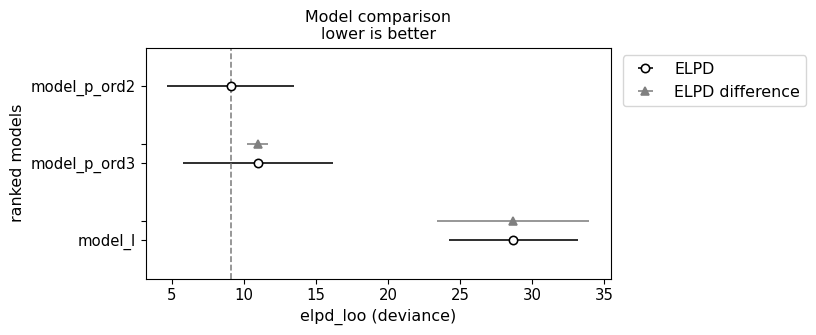

In [35]:
cmp_loo = az.compare({'model_l':idata_l, 'model_p_ord2':idata_p_ord2, 'model_p_ord3':idata_p_ord3},method='BB-pseudo-BMA', ic="loo", scale="deviance")
print(cmp_loo)
az.plot_compare(cmp_loo)